In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Timeseries techniques for handling missing value
# https://www.kaggle.com/juejuewang/handle-missing-values-in-time-series-for-beginners

# https://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [2]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 407B-ED03

 Directory of C:\Users\shyam\Downloads\AWS-ML-Study-Material\Code\AmazonSageMakerCourse-master\DeepAR\MissingValue

14-05-2021  13:07    <DIR>          .
14-05-2021  13:07    <DIR>          ..
14-05-2021  13:07    <DIR>          .ipynb_checkpoints
30-04-2021  10:58             5,629 Timeseries.ipynb
30-04-2021  10:58               176 VehicleTraffic.csv
               2 File(s)          5,805 bytes
               3 Dir(s)  423,154,040,832 bytes free


In [3]:
df = pd.read_csv('VehicleTraffic.csv')

In [4]:
df

,TimeStamp,Vehicles
0,12/4/2018 1:00,95
1,12/4/2018 2:00,90
2,12/4/2018 3:00,98
3,12/4/2018 4:00,98
4,12/4/2018 7:00,84
5,12/4/2018 8:00,82
6,12/4/2018 9:00,77
7,12/4/2018 10:00,93


In [5]:
df.dtypes

TimeStamp    object
Vehicles      int64
dtype: object

In [6]:
df = pd.read_csv('VehicleTraffic.csv', parse_dates=[0], index_col=0)

In [7]:
df

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95
2018-12-04 02:00:00,90
2018-12-04 03:00:00,98
2018-12-04 04:00:00,98
2018-12-04 07:00:00,84
2018-12-04 08:00:00,82
2018-12-04 09:00:00,77
2018-12-04 10:00:00,93


In [8]:
df.dtypes

Vehicles    int64
dtype: object

In [9]:
df.index[:5]

DatetimeIndex(['2018-12-04 01:00:00', '2018-12-04 02:00:00',
               '2018-12-04 03:00:00', '2018-12-04 04:00:00',
               '2018-12-04 07:00:00'],
              dtype='datetime64[ns]', name='TimeStamp', freq=None)

In [10]:
df['2018']

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95
2018-12-04 02:00:00,90
2018-12-04 03:00:00,98
2018-12-04 04:00:00,98
2018-12-04 07:00:00,84
2018-12-04 08:00:00,82
2018-12-04 09:00:00,77
2018-12-04 10:00:00,93


In [11]:
df['2018-12']

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95
2018-12-04 02:00:00,90
2018-12-04 03:00:00,98
2018-12-04 04:00:00,98
2018-12-04 07:00:00,84
2018-12-04 08:00:00,82
2018-12-04 09:00:00,77
2018-12-04 10:00:00,93


In [12]:
df['2018-12-04 02':'2018-12-04 03']

,Vehicles
TimeStamp,
2018-12-04 02:00:00,90
2018-12-04 03:00:00,98


In [13]:
df.loc['2018-12-04 02']

Vehicles    90
Name: 2018-12-04 02:00:00, dtype: int64

In [14]:
df.loc['2018-12-04 02':]

,Vehicles
TimeStamp,
2018-12-04 02:00:00,90
2018-12-04 03:00:00,98
2018-12-04 04:00:00,98
2018-12-04 07:00:00,84
2018-12-04 08:00:00,82
2018-12-04 09:00:00,77
2018-12-04 10:00:00,93


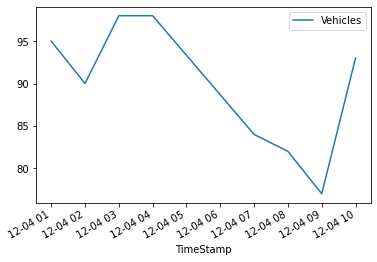

In [15]:
df.plot()
#df.plot(style='bo')

In [16]:
df.index.min()

Timestamp('2018-12-04 01:00:00')

In [17]:
list(df.Vehicles)

[95, 90, 98, 98, 84, 82, 77, 93]

In [18]:
df

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95
2018-12-04 02:00:00,90
2018-12-04 03:00:00,98
2018-12-04 04:00:00,98
2018-12-04 07:00:00,84
2018-12-04 08:00:00,82
2018-12-04 09:00:00,77
2018-12-04 10:00:00,93


In [19]:
df.resample('1h').mean()

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95.0
2018-12-04 02:00:00,90.0
2018-12-04 03:00:00,98.0
2018-12-04 04:00:00,98.0
2018-12-04 05:00:00,NaN
2018-12-04 06:00:00,NaN
2018-12-04 07:00:00,84.0
2018-12-04 08:00:00,82.0
2018-12-04 09:00:00,77.0


In [20]:
df_resampled = df.resample('1h').mean()

In [21]:
df_resampled

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95.0
2018-12-04 02:00:00,90.0
2018-12-04 03:00:00,98.0
2018-12-04 04:00:00,98.0
2018-12-04 05:00:00,NaN
2018-12-04 06:00:00,NaN
2018-12-04 07:00:00,84.0
2018-12-04 08:00:00,82.0
2018-12-04 09:00:00,77.0


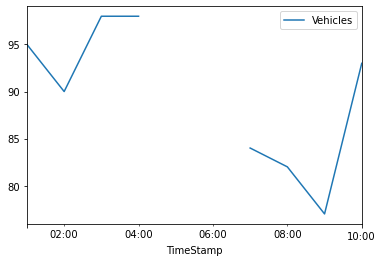

In [22]:
# Temperature for two time steps are missing
df_resampled.plot()

In [23]:
df_resampled.index.min()

Timestamp('2018-12-04 01:00:00', freq='H')

In [24]:
list(df_resampled.Vehicles)

[95.0, 90.0, 98.0, 98.0, nan, nan, 84.0, 82.0, 77.0, 93.0]

<h2>Working With Missing Data</h2>
https://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [25]:
df_resampled

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95.0
2018-12-04 02:00:00,90.0
2018-12-04 03:00:00,98.0
2018-12-04 04:00:00,98.0
2018-12-04 05:00:00,NaN
2018-12-04 06:00:00,NaN
2018-12-04 07:00:00,84.0
2018-12-04 08:00:00,82.0
2018-12-04 09:00:00,77.0


In [26]:
# Forward Fill values
df_resampled['ffill'] = df_resampled['Vehicles'].fillna(method='ffill')
# Back fill values
df_resampled['bfill'] = df_resampled['Vehicles'].fillna(method='bfill')
# Interpolate missing values
# Linear
df_resampled['linear'] = df_resampled['Vehicles'].interpolate()
df_resampled['quadratic'] = df_resampled['Vehicles'].interpolate(method='quadratic')

In [27]:
df_resampled

,Vehicles,ffill,bfill,linear,quadratic
TimeStamp,,,,,
2018-12-04 01:00:00,95.0,95.0,95.0,95.000000,95.000000
2018-12-04 02:00:00,90.0,90.0,90.0,90.000000,90.000000
2018-12-04 03:00:00,98.0,98.0,98.0,98.000000,98.000000
2018-12-04 04:00:00,98.0,98.0,98.0,98.000000,98.000000
2018-12-04 05:00:00,NaN,98.0,84.0,93.333333,93.898529
2018-12-04 06:00:00,NaN,98.0,84.0,88.666667,87.719892
2018-12-04 07:00:00,84.0,84.0,84.0,84.000000,84.000000
2018-12-04 08:00:00,82.0,82.0,82.0,82.000000,82.000000
2018-12-04 09:00:00,77.0,77.0,77.0,77.000000,77.000000


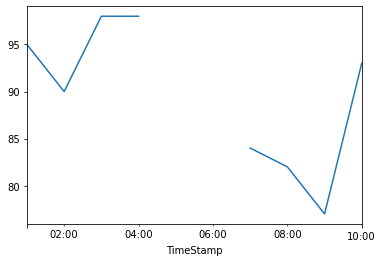

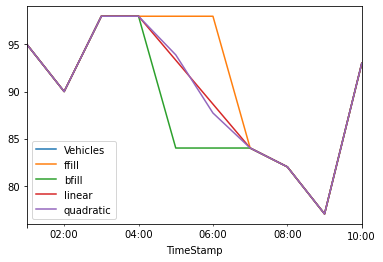

In [28]:
df_resampled['Vehicles'].plot()
df_resampled.plot()